In [1]:
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

from gym_minigrid_navigation.utils import show_video
from utils import init_logger, switch_reproducibility_on, display_stats

init_logger('master_worker')
init_logger('train_worker')

In [3]:
from pyhocon import ConfigFactory

config = ConfigFactory.parse_file('../conf/minigrid_navigation_mlp_master_worker.hocon')
config['env']['video_path'] = './video/'

In [4]:
switch_reproducibility_on(config['seed'])

# Train worker

In [5]:
import train_worker

In [6]:
env = train_worker.gen_navigation_env(config['env'])

In [7]:
worker_agent = train_worker.get_agent(config)

In [8]:
scores, steps = train_worker.run_episodes(env, worker_agent, n_episodes=1000, verbose=config['training.verbose'])

2021-03-31 17:32:06,976 INFO    train_worker           : Episode: 100. scores: -10.46, steps: 113.68, achieved: 0.83
2021-03-31 17:32:43,733 INFO    train_worker           : Episode: 200. scores: -6.63, steps: 76.69, achieved: 0.94
2021-03-31 17:33:12,624 INFO    train_worker           : Episode: 300. scores: -5.43, steps: 64.63, achieved: 0.94
2021-03-31 17:33:32,535 INFO    train_worker           : Episode: 400. scores: -3.32, steps: 44.01, achieved: 0.98
2021-03-31 17:33:50,109 INFO    train_worker           : Episode: 500. scores: -2.74, steps: 38.34, achieved: 0.99
2021-03-31 17:34:02,279 INFO    train_worker           : Episode: 600. scores: -1.56, steps: 26.52, achieved: 0.99
2021-03-31 17:34:10,872 INFO    train_worker           : Episode: 700. scores: -0.77, steps: 18.67, achieved: 1.00
2021-03-31 17:34:16,900 INFO    train_worker           : Episode: 800. scores: -0.19, steps: 12.94, achieved: 1.00
2021-03-31 17:34:24,566 INFO    train_worker           : Episode: 900. scores:

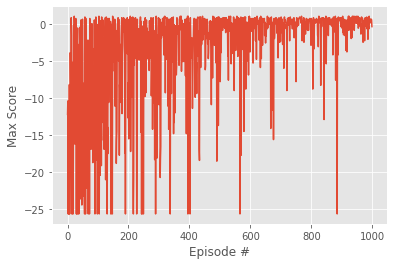

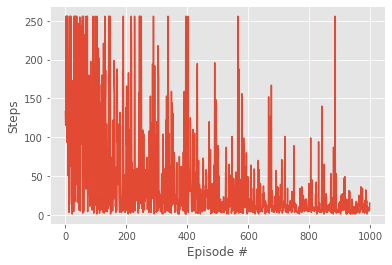

In [9]:
display_stats(scores, steps)

# Train master

In [10]:
import train_master
init_logger('train_master')

In [11]:
config = ConfigFactory.parse_file('../conf/minigrid_navigation_mlp_master_worker.hocon')
del config['env']['goal_achieving_criterion']
del config['env']['goal_type']

In [12]:
emb_size = worker_agent.qnetwork_local.master.output_size
master_agent = train_master.get_master_agent(emb_size, config)

In [13]:
env = train_worker.gen_env(config['env'])

In [14]:
scores, steps = train_master.run_episodes(env, worker_agent, master_agent, n_episodes=1000, verbose=config['training.verbose'])

2021-03-31 17:38:17,732 INFO    train_master           : Episode: 100. scores: 0.16, steps: 219.97
2021-03-31 17:41:31,363 INFO    train_master           : Episode: 200. scores: 0.21, steps: 207.12
2021-03-31 17:44:38,862 INFO    train_master           : Episode: 300. scores: 0.25, steps: 199.10
2021-03-31 17:47:04,563 INFO    train_master           : Episode: 400. scores: 0.43, steps: 150.89
2021-03-31 17:49:31,539 INFO    train_master           : Episode: 500. scores: 0.46, steps: 142.71
2021-03-31 17:51:45,809 INFO    train_master           : Episode: 600. scores: 0.52, steps: 129.23
2021-03-31 17:53:53,298 INFO    train_master           : Episode: 700. scores: 0.55, steps: 121.11
2021-03-31 17:55:59,540 INFO    train_master           : Episode: 800. scores: 0.55, steps: 122.67
2021-03-31 17:58:10,807 INFO    train_master           : Episode: 900. scores: 0.55, steps: 122.32
2021-03-31 18:00:15,561 INFO    train_master           : Episode: 1000. scores: 0.55, steps: 122.68


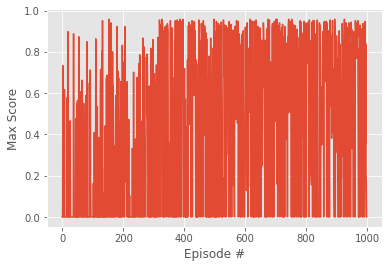

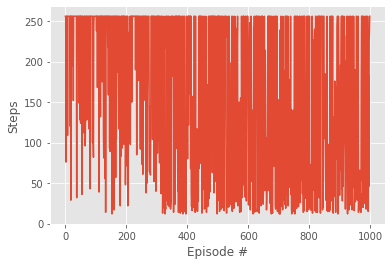

In [15]:
display_stats(scores, steps)

In [21]:
show_video('../outputs/video/')